# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [3]:
# Code Here

!pip install palmerpenguins
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from palmerpenguins import load_penguins
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from plotnine import *

In [4]:
# print first few rows

penguins = load_penguins()
penguins = penguins.dropna()
penguins.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

- ONE PLOT ONLY PLOTTING R^2

### Model 1

In [25]:
# Model 1 -> 7 predictor variables
# Defining X as dataframe of all the other variables and y as our target variable bill depth

penguins = load_penguins()
penguins = penguins.dropna()
# X is a DataFrame
X = penguins.drop('bill_depth_mm', axis = 1) # still a two-dimensional object

# y is a series
y = penguins['bill_depth_mm'] # list of one thing

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [26]:
# Dummify necessary variables

lr = LinearRegression()
enc = OneHotEncoder() # helps automatically dummify variables

ct = ColumnTransformer([('dummify_s', enc, ['species']), # whatever you want to do to your testing
                        ('dummify_i', enc, ['island']),
                        ('dummify_sex', enc, ['sex'])]
)


# [('scaler, StandardScaler()), ('svc', SVC())]

my_pipeline = Pipeline(
    [('dummify_everything',ct),
    ('ols',lr)] # just labeling it as linear regression; ols stands for...idk
)

In [ ]:
# Fit the data

fitted_pipeline = my_pipeline.fit(X_train, y_train)
fitted_pipeline
y_predicted_l = fitted_pipeline.predict(X_test)
y_predicted_l

y_predicted_lt = fitted_pipeline.predict(X_train)
y_predicted_lt

In [29]:
# Model 1 r^2

r2_score(y_test, y_predicted_l)
r2_score(y_train, y_predicted_lt)

0.8301281439840233

### Model 2

In [20]:
# Model 2
X = penguins[['flipper_length_mm','body_mass_g']] # still a two-dimensional object

# y is a series
y = penguins['bill_depth_mm'] # list of one thing

X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y)


In [ ]:
lr = LinearRegression()

# [('scaler, StandardScaler()), ('svc', SVC())]

my_pipeline_2 = Pipeline([('ols',lr)] # just labeling it as linear regression; ols stands for...idk
)
# Fitted Model
fitted_pipeline_2 = my_pipeline_2.fit(X_train2, y_train2)
fitted_pipeline_2

# Predict y values
y_predicted_2 = fitted_pipeline_2.predict(X_test2)
y_predicted_2

y_predicted_2t = fitted_pipeline_2.predict(X_train2)
y_predicted_2t

In [23]:
# Model 2 r^2
r2_score(y_test2, y_predicted_2)
r2_score(y_train2, y_predicted_2t)

0.32670600077803236

### Model 3

In [16]:
# Model 3 -> 5 predictor variables

# X is a DataFrame
X = penguins.drop(['bill_depth_mm','flipper_length_mm','body_mass_g'], axis = 1) # still a two-dimensional object

# y is a series
y = penguins['bill_depth_mm'] # list of one thing

X_train3, X_test3, y_train3, y_test3 = train_test_split(X,y)

In [ ]:
lr = LinearRegression()
enc = OneHotEncoder() # helps automatically dummify variables

ct = ColumnTransformer([('dummify_s', enc, ['species']), # whatever you want to do to your testing
                        ('dummify_i', enc, ['island']),
                        ('dummify_sex', enc, ['sex'])]
)


my_pipeline_3 = Pipeline(
    [('dummify_everything',ct),
    ('ols',lr)] # just labeling it as linear regression; ols stands for...idk
)
# Fitted quadratic Model
fitted_pipeline_3 = my_pipeline_3.fit(X_train3, y_train3)
fitted_pipeline_3

# Predict y values on Quadratic model
y_predicted_3 = fitted_pipeline_3.predict(X_test3)
y_predicted_3

y_predicted_3t = fitted_pipeline_3.predict(X_train3)
y_predicted_3t

In [18]:
# Model 3 r^2
r2_score(y_test3, y_predicted_3)
r2_score(y_train3,y_predicted_3t)

0.834476243378675

In [30]:
len(y_predicted_3)

84

### Model 4

In [9]:
# Model 4

# X is a DataFrame
X = penguins.drop(['bill_depth_mm','species','year'], axis = 1) # still a two-dimensional object

# y is a series
y = penguins['bill_depth_mm'] # list of one thing

X_train4, X_test4, y_train4, y_test4 = train_test_split(X,y)

In [ ]:
lr = LinearRegression()
enc = OneHotEncoder() # helps automatically dummify variables

ct = ColumnTransformer([ ('dummify_i', enc, ['island']),
                        ('dummify_sex', enc, ['sex'])]# whatever you want to do to your testing
)


my_pipeline_4 = Pipeline(
    [('dummify_everything',ct),
    ('ols',lr)] # just labeling it as linear regression; ols stands for...idk
)
# Fitted quadratic Model
fitted_pipeline_4 = my_pipeline_4.fit(X_train4, y_train4)
fitted_pipeline_4

# Predict y values on Quadratic model (test)
y_predicted_4 = fitted_pipeline_4.predict(X_test4)
y_predicted_4

y_predicted_4t = fitted_pipeline_4.predict(X_train4)
y_predicted_4t

In [15]:
# Model 4 r^2
r2_score(y_test4, y_predicted_4)
r2_score(y_train4,y_predicted_4t)

0.5547837403313931

In [13]:
len(y_predicted_4)

84

### Data Frame and Plot

In [31]:

test_error = {'model':[1,2,3,4], 'predictors':[7,2,5,5],
              'r2_test':[0.8163511199851206,0.24624402568939774,0.831021873419345,0.5148552251677402],
              'r2_train': [0.8301281439840233,0.32670600077803236,0.834476243378675,0.5547837403313931]}
r2 = pd.DataFrame(test_error)
r2

,model,predictors,r2_test,r2_train
0,1,7,0.816351,0.830128
1,2,2,0.246244,0.326706
2,3,5,0.831022,0.834476
3,4,5,0.514855,0.554784


so we calculate r^2 for test and training data? why do we do this?

In [35]:
from scipy import stats

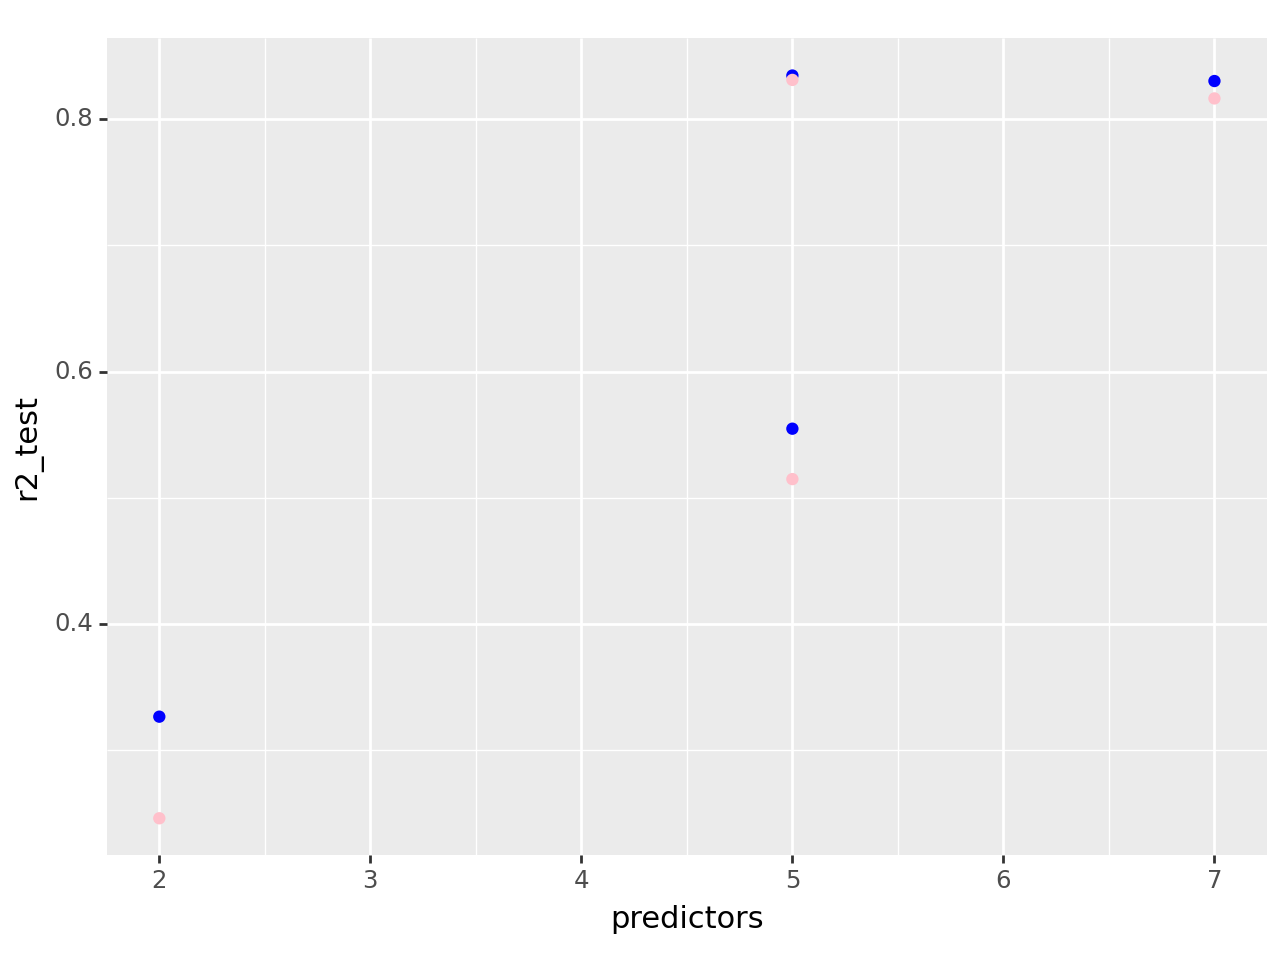

<Figure Size: (640 x 480)>

In [39]:
(ggplot(r2, aes(x = 'predictors', y = 'r2_test'))
+ geom_point(aes(y = 'r2_train'), color = 'blue')
+ geom_point(aes( y = 'r2_test'),color = 'pink'))